Visualizer
======
Histograms for the training data

First import everything




In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


In [22]:
pd.get_option("display.max_columns")

20

In [23]:
df = pd.read_csv('train.csv')
pd.set_option("display.max_columns",101)
print(df.head(3))

price = df['SalePrice']


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     V

## SalePrice
Check whether the saleprice is normally distributed.

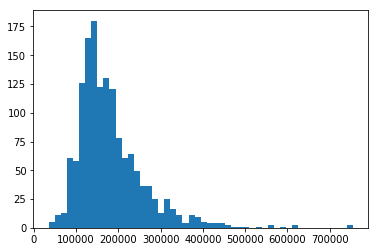

In [3]:
plt.hist(price, bins=50)
plt.show()

The Houseprice seems normally distributed. However, there are some outlier that we might discard that have a value greater than 500k. The total count of these occurences are:

In [4]:
len(df[price>500000])

9

## LotFrontage
Replace all the nans with value of '0' to make sure they are outside of the spectrum

_(there were no 0 values observed)_

In [2]:
x_nan = df[df['LotFrontage'].isna()]
x_nan['LotFrontage'] = x_nan['LotFrontage'].fillna(0)
price_nan = x_nan['SalePrice']

NameError: name 'df' is not defined

c:\users\ruben\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


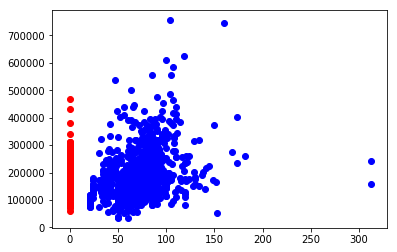

In [86]:
x_nan = df[df['LotFrontage'].isna()]
x_nan['LotFrontage'] = x_nan['LotFrontage'].fillna(0)
lot_nan = x_nan['LotFrontage']
price_nan = x_nan['SalePrice']

temp = df['LotFrontage'].dropna()
dfnew = df.iloc[temp.index.values]
price_x = dfnew['SalePrice']


plt.scatter(temp, price_x, c='b', label='Normal')
plt.scatter(lot_nan,price_nan, c='r', label='NaN')
plt.show()

Two outliers are being observed, where the LotFrontage is greater than 300.
These correspond to the rows:

In [24]:
df[df['LotFrontage'] > 300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Also, two possible outliers where the houseprice is greater than 700k:

In [7]:
df[price>700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## SalePrice Trend

We now investigate the trend of the sale price over the date.


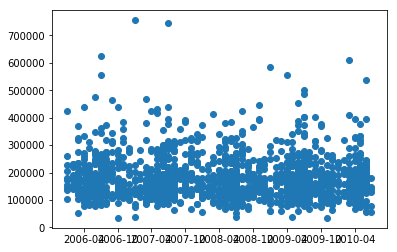

In [29]:
date = pd.to_datetime({'year': df['YrSold'], 'month': df['MoSold'], 'day': 1})
df = df.assign(date=date).drop('YrSold', 1)

dates = []
for time in date:
    dates.append(pd.Timestamp(time).to_pydatetime())

    

plt.plot_date(dates, price)

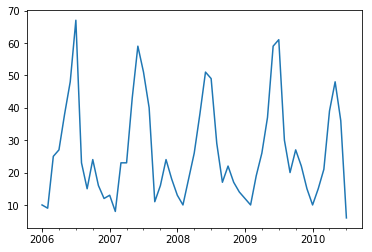

In [132]:
df.groupby(date).count()['SalePrice'].plot()

Average house price per month

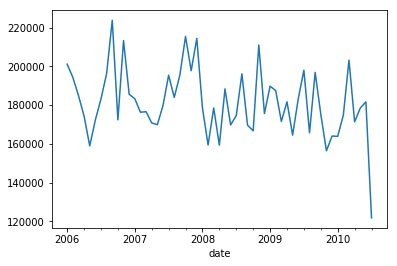

In [151]:
df.groupby(pd.Grouper(key='date', freq='M')).mean()['SalePrice'].plot()

## Year built

Does the age of the house help to determine the housing price?

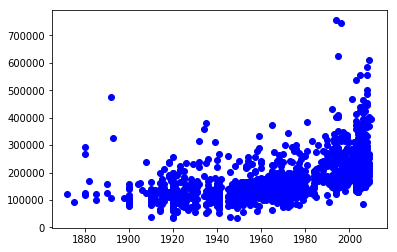

In [28]:
plt.scatter(df['YearBuilt'], price, c='b', label='Normal')


### Utilities

There are some features in the dataset that do not contribute to the classification of housing prices. One of those are the utilities. Upon investigation there is just one entry that has a different value for Utilities.

In [24]:
#df[df['SaleCondition'] == 'Partial']
#plt.hist(df['SaleCondition'])
df[df['Utilities'] != 'AllPub']


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111,Rec,354,354,819,GasA,Gd,Y,FuseA,1344,0,0,1344,0,1,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2,525,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


# Correlation with previous month


In [58]:
grouped = df.groupby(pd.Grouper(key='date', freq='M'))['SalePrice']


In [68]:
prevgroup = None
for name, group in grouped:
    if prevgroup is None:
        pass
    else:
        print(scipy.stats.pearsonr(prevgroup.mean, group.mean))
    
    #print(name)
    #print(group)
    #print('bb\n')
    prevgroup = group

TypeError: len() of unsized object

In [57]:

i=0
for i, val in enumerate(grouped):
    print(i,val,'bb\n')

prevgroup = 0
for name, group in grouped:
    print(name)
    print(group)
    print('bb\n')
    prevgroup = group

#len(months)
#scipy.stats.pearsonr(months[0],months[1])
#df.corr(months[0],months[1])

0 (Timestamp('2006-01-31 00:00:00', freq='M'), 141     260000
169     228000
302     205000
370     172400
411     145000
664     423000
810     181000
996     136500
1040    155000
1404    105000
Name: SalePrice, dtype: int64) bb

1 (Timestamp('2006-02-28 00:00:00', freq='M'), 3       140000
222     179900
255     230000
545     229000
602     220000
892     154500
948     192500
1033    230000
1167    173000
Name: SalePrice, dtype: int64) bb

2 (Timestamp('2006-03-31 00:00:00', freq='M'), 81      153500
154     125000
159     320000
197     235000
219     167240
293     235000
295     142500
416     149500
480     326000
511     202665
585     369900
598     217500
753     275500
883     118500
946     143000
969     140000
1077    138800
1083    160000
1185    104900
1238    142500
1246    186500
1251    171750
1265    183900
1293    162900
1337     52500
Name: SalePrice, dtype: int64) bb

3 (Timestamp('2006-04-30 00:00:00', freq='M'), 85      260000
145     130000
149     115000
22

In [71]:
months = df.groupby(pd.Grouper(key='date', freq='M')).mean()['SalePrice'].values
for i, val in enumerate(months):
    if (i>0 and i < len(months)):
        print(scipy.stats.pearsonr(months[i], months[i-1]))
    

TypeError: len() of unsized object

In [79]:
months = df.groupby(pd.Grouper(key='date', freq='M')).mean()['SalePrice'].values

corrList = []
for i, price_i in enumerate(months):
    val1 = months[i]
    val2 = -1
    for j, price_j in enumerate(months):
        if (i+1 == j):
            val2 = months[j]
    if (val2 > -1):
        corrList.append([val1, val2])      
# I need an array like:
# AB
# BC
# CD
# DE
correlations = np.array(corrList)

Correlation between previous months sale prices and current months sale prices:

In [99]:
correlations[:,0]
scipy.stats.pearsonr(correlations[:,0],correlations[:,1])[0]


0.12321466903459902